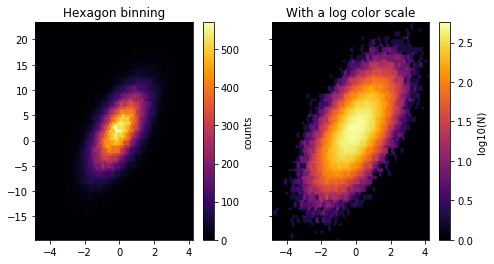

In [46]:
#hexbin

import numpy as np
import matplotlib.pyplot as plt

np.random.seed(0)
n = 100000
x = np.random.standard_normal(n)
y = 2.0 + 3.0 * x + 4.0 * np.random.standard_normal(n)
xmin = x.min()
xmax = x.max()
ymin = y.min()
ymax = y.max()

fig, axs = plt.subplots(ncols=2, sharey=True, figsize=(7, 4))
fig.subplots_adjust(hspace=0.5, left=0.07, right=0.93)
ax = axs[0]
hb = ax.hexbin(x, y, gridsize=50, cmap='inferno')
ax.axis([xmin, xmax, ymin, ymax])
ax.set_title("Hexagon binning")
cb = fig.colorbar(hb, ax=ax)
cb.set_label('counts')

ax = axs[1]
hb = ax.hexbin(x, y, gridsize=50, bins='log', cmap='inferno')
ax.axis([xmin, xmax, ymin, ymax])
ax.set_title("With a log color scale")
cb = fig.colorbar(hb, ax=ax)
cb.set_label('log10(N)')

plt.show()

4
11
[ 0  1  2  3  4  5  6  7  8  9 10]
['', '', 'S1', '', '']
['', 'S2']
['S3']
['', 'S4', '']
[0.7, 0.7, 0.7, 0.7, 0.7, 0.2, 0.2, 0.5, 0.4, 0.4, 0.4]


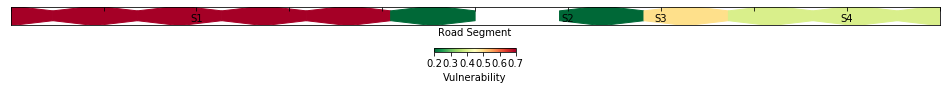

In [244]:
# including segment length, not working!

import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import math

road_segments = ['S1','S2','S3','S4']
number_segments = len(road_segments)
print(number_segments)
segment_length = [5,2,1,3]
total_length = 0
for i in segment_length:
    total_length += i
print(total_length)
segment_vulnerability = [0.7,0.2,0.5,0.4]

x = np.arange(total_length)
print(x)

segment_vulnerability2 = []
road_segments2 = []
for i in range(len(road_segments)):
    vulnerability_extended = []
    segment_extended = []
    for j in range(segment_length[i]):
        vulnerability_extended.append(segment_vulnerability[i])
    for j in range(math.floor(segment_length[i]/2)):
        segment_extended.append('')
    segment_extended.append(road_segments[i])
    if segment_length[i]%2 == 0:
        for j in range(int(segment_length[i]/2+1),segment_length[i]):
            segment_extended.append('')
    else:
        for j in range(math.ceil(segment_length[i]/2),segment_length[i]):
            segment_extended.append('')
    print(segment_extended)
    segment_vulnerability2.extend(vulnerability_extended)
    road_segments2.extend(segment_extended)
print(segment_vulnerability2)
y = np.ones(total_length)

xmin = x.min()
xmax = x.max()
if (total_length%2 == 0 & number_segments%2 == 0):
    gridsize = total_length-1
elif (total_length%2 != 0 & number_segments%2 != 0):
    gridsize = total_length
else:
    gridsize = total_length

fig, axs = plt.subplots(ncols=1, sharey=True, figsize=(15, 0.5))
fig.subplots_adjust(hspace=0.5, left=0.07, right=0.93)
hb = axs.hexbin(x, y, segment_vulnerability2, gridsize=gridsize, cmap='RdYlGn_r')
axs.axis([xmin, xmax, 0.99, 1.01])
axs.get_yaxis().set_visible(False)
plt.xticks(x,road_segments2)
plt.xlabel('Road Segment')
cb = fig.colorbar(hb, ax=axs, orientation='horizontal', pad = 1.5)
cb.set_label('Vulnerability')

plt.show()

8
[0 1 2 3 4 5 6 7]
[ 1.  1.  1.  1.  1.  1.  1.  1.]


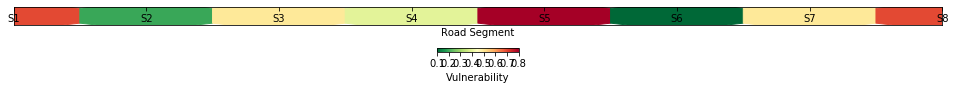

In [259]:
# without segment length

import numpy as np
import matplotlib
import matplotlib.pyplot as plt

road_segments = ['S1','S2','S3','S4','S5','S6','S7','S8']
number_segments = len(road_segments)
print(number_segments)
segment_vulnerability = [0.7,0.2,0.5,0.4,0.8,0.1,0.5,0.7]

x = np.arange(number_segments)
print(x)
print(y)

y = np.ones(number_segments)

xmin = x.min()
xmax = x.max()

fig, axs = plt.subplots(ncols=1, sharey=True, figsize=(15, 0.5))
fig.subplots_adjust(hspace=0.5, left=0.07, right=0.93)
hb = axs.hexbin(x, y, segment_vulnerability, gridsize=number_segments-1, cmap='RdYlGn_r')
axs.axis([xmin, xmax, 0.99, 1.01])
axs.get_yaxis().set_visible(False)
plt.xticks(x,road_segments)
plt.xlabel('Road Segment')
cb = fig.colorbar(hb, ax=axs, orientation='horizontal', pad=1.5)
cb.set_label('Vulnerability')

plt.show()